### Day2 work: 보스턴 집값 선형회귀
- datasets: bostan.csv
- feature: high correlation to label in [CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]
- label: MEDV
- 
- use Pytorch
- learning method: supervised learning, regression
- learning algorithm: linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optima

In [2]:
boston_df = pd.read_csv('../data/boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
corr = boston_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
import seaborn as sns

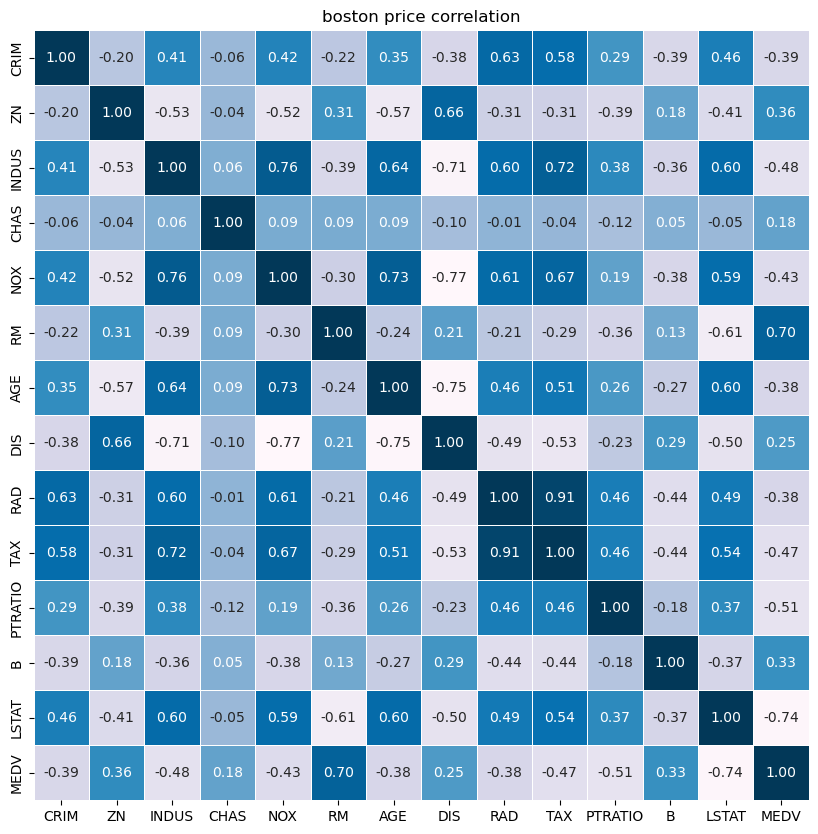

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='PuBu', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('boston price correlation')
plt.show()

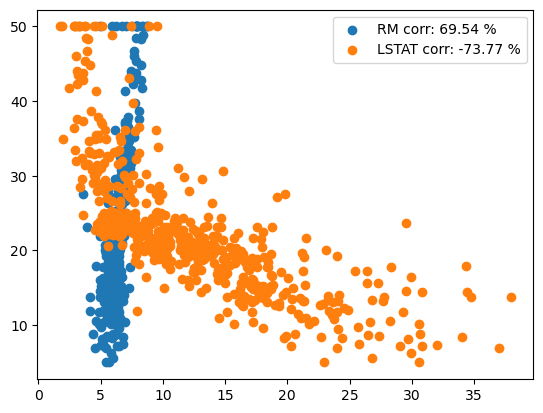

In [7]:
plt.scatter(boston_df['RM'], boston_df['MEDV'], label=f'RM corr: {corr.iloc[5, -1]*100:.2f} %')
plt.scatter(boston_df['LSTAT'], boston_df['MEDV'], label=f"LSTAT corr: {corr.iloc[-2, -1]*100:.2f} %")

plt.legend()
plt.show()

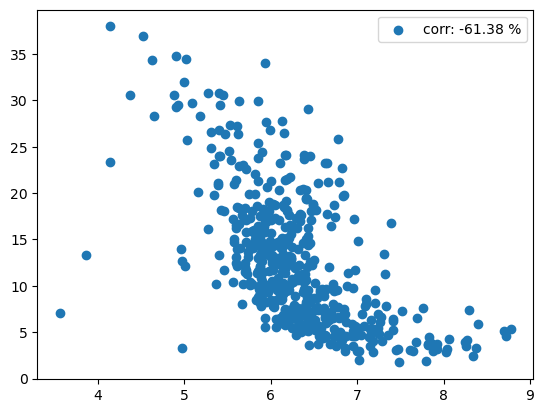

In [8]:
plt.scatter(boston_df['RM'], boston_df['LSTAT'], label=f'corr: {corr.iloc[5, -2]*100:.2f} %')
plt.legend()
plt.show()

- 고민이긴 하지만 상관성이 높은 feature로 'RM', 'LSTAT' 사용 결정
- 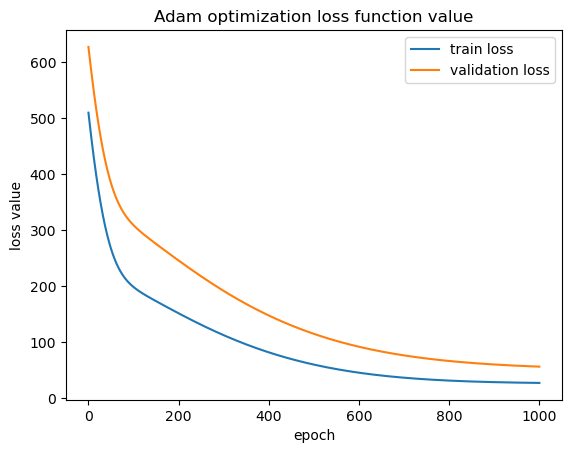
- 전부 다 넣기로 결정...
- 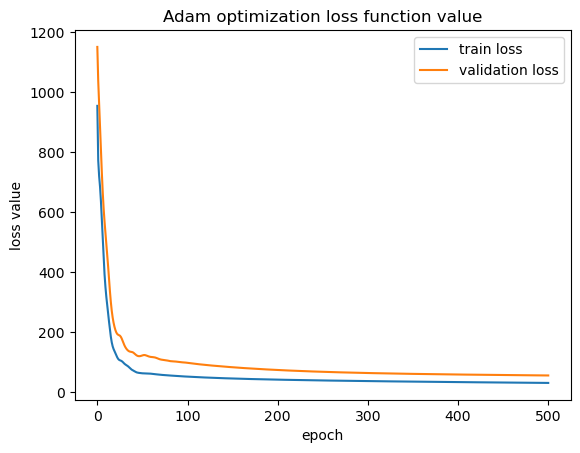
- 진심 나한테 왜 그래...

In [9]:
# random_state : 33
torch.manual_seed(33)

In [138]:
# feature & label
feature_ts = torch.from_numpy(boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values).float()
label_ts = torch.from_numpy(boston_df[['MEDV']].values).float()

print(f"feature: {feature_ts.shape}, {feature_ts.ndim}D")
print(f"label: {label_ts.shape}, {label_ts.ndim}D")

feature: torch.Size([506, 13]), 2D
label: torch.Size([506, 1]), 2D


In [139]:
# train : test = 8 : 2
# random_state: 33

X_train, X_test, y_train, y_test = train_test_split(feature_ts, label_ts, random_state=33, test_size=0.2)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D")
print(f"train & test ratio: {X_train.shape[0]/feature_ts.shape[0]*100:.2f} %, {X_test.shape[0]/feature_ts.shape[0]*100:.2f} %\n\n")

# trian : val = 8 : 2
# random_state: 33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=33, test_size=0.2)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D")
print(f"X val: {X_val.shape}, {X_val.ndim}D")
print(f"y val: {y_val.shape}, {y_val.ndim}D")
print(f"train & val ratio: {X_train.shape[0]/(feature_ts.shape[0]-X_test.shape[0])*100:.2f} %, {X_test.shape[0]/(feature_ts.shape[0]-X_test.shape[0])*100:.2f} %")


X train: torch.Size([404, 13]), 2D
y train: torch.Size([404, 1]), 2D
X test: torch.Size([102, 13]), 2D
y test: torch.Size([102, 1]), 2D
train & test ratio: 79.84 %, 20.16 %


X train: torch.Size([323, 13]), 2D
y train: torch.Size([323, 1]), 2D
X val: torch.Size([81, 13]), 2D
y val: torch.Size([81, 1]), 2D
train & val ratio: 79.95 %, 25.25 %


In [172]:
# model instace
# input feature: RM, LSTAT
# output feature: MEDV

model = nn.Linear(13, 1)     # linear model

# weight & bais
for name, param in model.named_parameters():
    print(f"[{name}] {param}\n")

[weight] Parameter containing:
tensor([[ 0.1408,  0.2156,  0.2226,  0.1730, -0.0735,  0.1674, -0.0179,  0.0314,
         -0.1540, -0.1567,  0.0745,  0.1476,  0.1898]], requires_grad=True)

[bias] Parameter containing:
tensor([0.0276], requires_grad=True)



- kinds of optimization function
    - velocity: Adagrad, Adaddelta, RMSProp
    - momentum: momentum, NAG
    - velocity & momentum: Adam

In [173]:
# learning rate: 0.01
# adg_op = optima.Adagrad(model.parameters(), lr=0.01)
# add_op = optima.Adadelta(model.parameters(), lr=0.01)
# rmsp_op = optima.RMSprop(model.parameters(), lr=0.01)
adam_op = optima.Adam(model.parameters(), lr=0.001)

# adam_op을 먼저 쓰고 나머지는 비교군으로...

In [174]:
# test & validation function
# must not weight & bais update

def testing(test_ts, label_ts):
    
    with torch.no_grad():
        
        pre_y = model(test_ts)
        
        # 오차계산: loss function
        loss = F.mse_loss(pre_y, label_ts)
            
    return loss

In [175]:
# model learning function
def training(feature_ts, label_ts, val_feature_ts, val_label_ts, epochs, optimization, kind='Val'):
    loss_history = [[], []]
    
    for epoch in range(epochs+1):
        # 학습진행: forward
        pre_y = model(feature_ts)
        
        # 오차계산: loss function
        train_loss = F.mse_loss(pre_y, label_ts)
        loss_history[0].append(train_loss.item())
        
        # 최적화: optimization
        optimization.zero_grad()
        train_loss.backward()
        optimization.step()
        
        # validation
        val_loss = testing(val_feature_ts, val_label_ts)
        loss_history[1].append(val_loss)
        
        # 학습결과
        if epoch%10 == 0:
            print(f"epoch: {epoch:5}    loss: {train_loss.item():10.8f}")
            print(f"epoch: {epoch:5}    {kind}_loss: {val_loss.item():10.8f}")
            
    return loss_history

In [176]:
epochs = 10000
adam_loss = training(X_train, y_train, X_val, y_val, epochs, adam_op)

epoch:     0    loss: 1419.00878906
epoch:     0    Val_loss: 1827.52319336
epoch:    10    loss: 1011.04760742
epoch:    10    Val_loss: 1378.12438965
epoch:    20    loss: 775.55895996
epoch:    20    Val_loss: 1103.00634766
epoch:    30    loss: 667.47503662
epoch:    30    Val_loss: 958.59338379
epoch:    40    loss: 610.39288330
epoch:    40    Val_loss: 873.47625732
epoch:    50    loss: 558.30078125
epoch:    50    Val_loss: 804.30322266
epoch:    60    loss: 505.73687744
epoch:    60    Val_loss: 741.57550049
epoch:    70    loss: 456.74752808
epoch:    70    Val_loss: 683.76916504
epoch:    80    loss: 412.08044434
epoch:    80    Val_loss: 628.94378662
epoch:    90    loss: 371.24356079
epoch:    90    Val_loss: 576.68920898
epoch:   100    loss: 334.18533325
epoch:   100    Val_loss: 528.07702637
epoch:   110    loss: 300.93640137
epoch:   110    Val_loss: 484.06692505
epoch:   120    loss: 271.36257935
epoch:   120    Val_loss: 444.86618042
epoch:   130    loss: 245.2513580

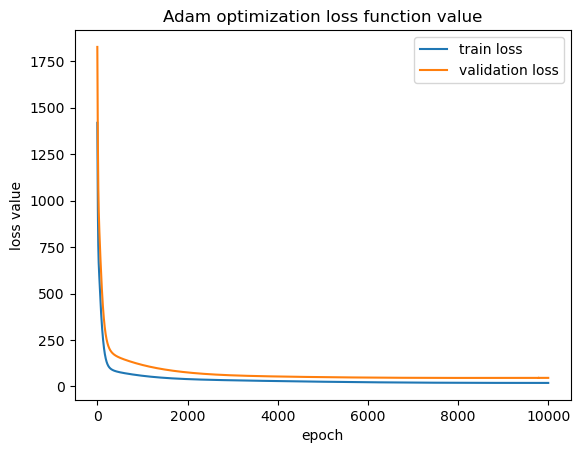

In [177]:
plt.plot(adam_loss[0], label='train loss')
plt.plot(adam_loss[1], label='validation loss')

plt.title('Adam optimization loss function value')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

- 하... 짜증나네...

In [178]:
from sklearn.metrics import mean_squared_error, r2_score

In [179]:
test_pred = model(X_test)
pred_list = []
test_list = []
for i in range(len(test_pred)):
    pred_list.append(test_pred[i].item())
    test_list.append(y_test[i].item())

test_mse = mean_squared_error(pred_list, test_list)
test_r2_score = r2_score(pred_list, test_list)

print(f"test MSE: {test_mse*100:.2f} %")
print(f"test R2 Score: {test_r2_score*100:.2f} %")


test MSE: 2361.00 %
test R2 Score: 64.86 %
